plot time evolution of momentum distribution for different laser beam radii

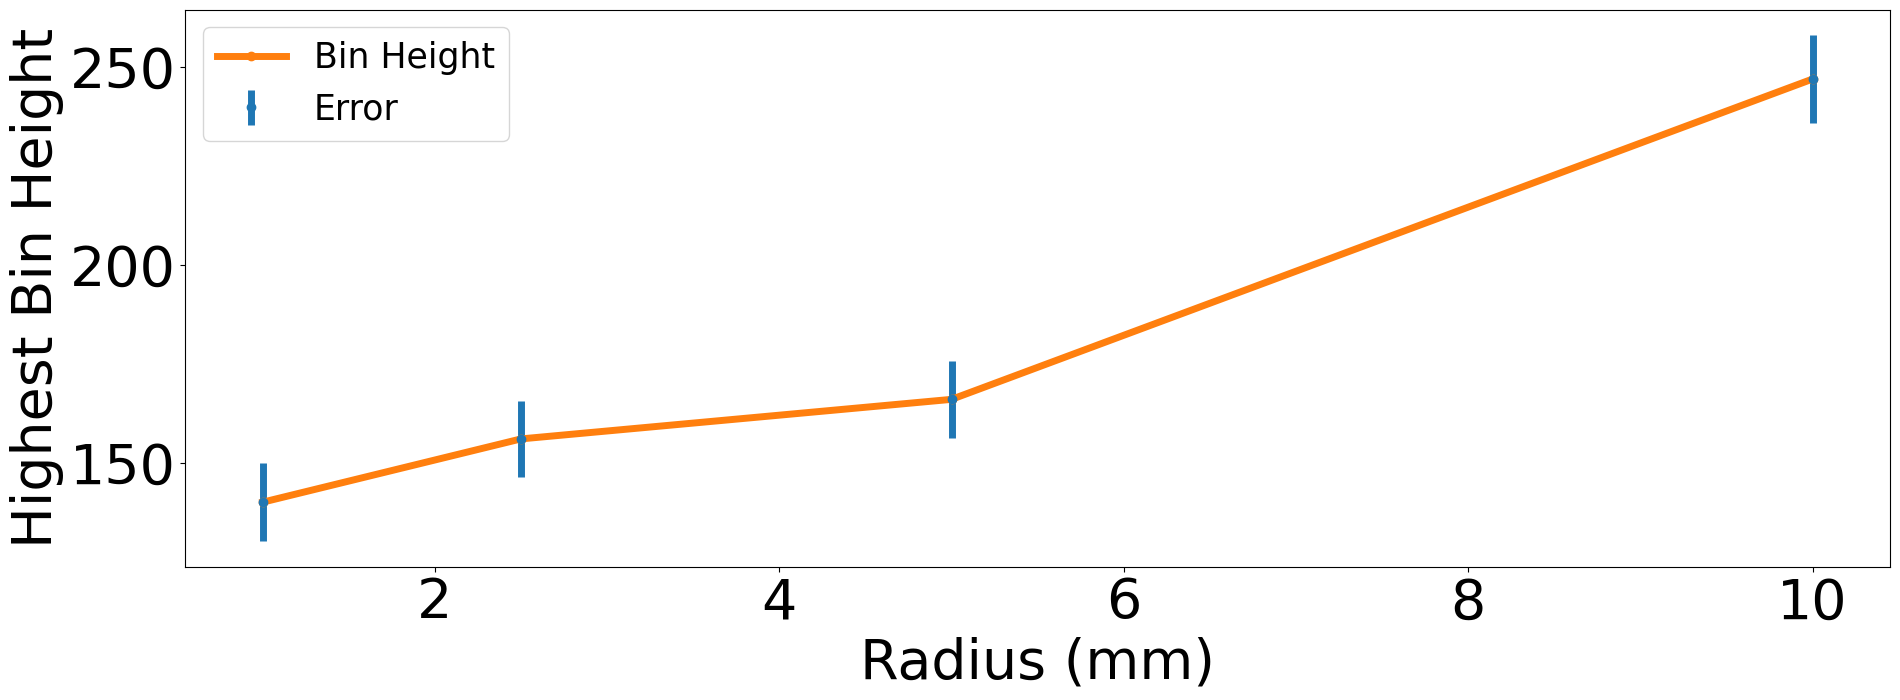

In [32]:
import numpy as np
import matplotlib.pyplot as plt

radius_list = ['1mm','2.5mm', '5mm', '10mm']
font_size = 40  # Set your desired font size here
legend_font_size = 25  # Set your desired legend font size here
figure_width = 20
figure_height = 8

max_heights_final_turn = []
std_in_bin_heights_first_turn=[]

for radius in radius_list:
    loaded_data = np.load(f'results/langzhou_data({radius}).npz')
    delta = loaded_data['delta']
    x = loaded_data['x'] * 1e3
    time = loaded_data['time']

    delta_first_turn = delta[0, :]
    delta_final_turn = delta[-1, :]

    bins = np.linspace(0e-4, 1e-4, 100)

    # Compute the histograms without plotting
    counts_first_turn, _ = np.histogram(delta_first_turn, bins=bins)
    counts_final_turn, _ = np.histogram(delta_final_turn, bins=bins)

    # Find the height of the highest bin
    max_height_first_turn = np.max(counts_first_turn)
    max_height_final_turn = np.max(counts_final_turn)

    # Append the heights to the lists
    max_heights_final_turn.append(max_height_final_turn)
    
    std_in_bin_heights_first_turn.append(np.std(counts_first_turn))
    
# Convert radius list to float
radius_list_float = [float(radius[:-2]) for radius in radius_list]

# Plotting the results
plt.figure(figsize=(figure_width, figure_height))
plt.rcParams.update({'font.size': font_size})
plt.errorbar(radius_list_float, max_heights_final_turn, yerr=std_in_bin_heights_first_turn, fmt='o', label='Error', linewidth=5)
plt.plot(radius_list_float, max_heights_final_turn, marker='o', label='Bin Height', linewidth=5)
# plt.scatter(radius_list_float, max_heights_final_turn, label='Final Turn', s=100)  # 's' parameter controls marker size
# plt.errorbar(radius_list_float, max_heights_final_turn, yerr=std_in_bin_heights_first_turn, fmt='none', capsize=5)  # Add error bars
plt.xlabel('Radius (mm)')
plt.ylabel('Highest Bin Height')
plt.legend(fontsize=legend_font_size)
plt.tight_layout()
plt.savefig('Cooling_rate_vs_laser_radius.png', format='png', dpi=300)
plt.show()

